### Lab-6 200968108
## Exercise-2
Google Stock Price Dataset

Importing required libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Importing the datasets
GSP_train = pd.read_csv("Google_Stock_Price_Train.csv")
GSP_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [12]:
GSP_test = pd.read_csv("Google_Stock_Price_Test.csv")
GSP_test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


In [13]:
# information of the data
GSP_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [14]:
# separating the data to apply the RNN
data = GSP_train.loc[:, ["Open"]].values
data

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [15]:
# Normalization wiht MinmaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
data_scaler = scaler.fit_transform(data)
data_scaler

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

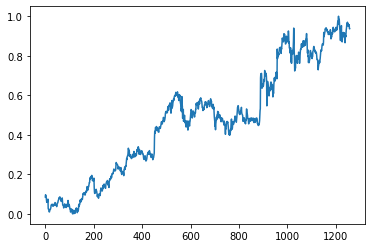

In [16]:
# vizualizing the scaled data
plt.plot(data_scaler)
plt.show()

Using 50 time steps and 4 layers of network in both the RNN and LSTM models.

In [17]:
X_train = []
y_train = []
timesteps = 50

for i in range(timesteps, len(data_scaler)):
  X_train.append(data_scaler[i-timesteps:i, 0])
  y_train.append(data_scaler[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

# reshaping the data
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [18]:
X_train.shape

(1208, 50, 1)

**Creating the RNN model with 4 layers**

In [19]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, Dropout

# Initialising the RNN
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1], 1)))
rnn_model.add(Dropout(0.2))

# Second RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn_model.add(Dropout(0.2))

# Third RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
rnn_model.add(Dropout(0.2))

# Fourth RNN layer and some Dropout regularisation
rnn_model.add(SimpleRNN(units = 50))
rnn_model.add(Dropout(0.2))

# Add the output layer
rnn_model.add(Dense(units = 1))

# Compiling the RNN
rnn_model.compile(optimizer = "adam", loss = "mean_squared_error")

# Fitting the RNN to the training set
rnn_model.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 52ms/step - loss: 0.4016
Epoch 2/100
38/38 [==============================] - 2s 47ms/step - loss: 0.2793
Epoch 3/100
38/38 [==============================] - 2s 50ms/step - loss: 0.2354
Epoch 4/100
38/38 [==============================] - 2s 46ms/step - loss: 0.2103
Epoch 5/100
38/38 [==============================] - 2s 46ms/step - loss: 0.1359
Epoch 6/100
38/38 [==============================] - 2s 50ms/step - loss: 0.1128
Epoch 7/100
38/38 [==============================] - 2s 45ms/step - loss: 0.0967
Epoch 8/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0808
Epoch 9/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0707
Epoch 10/100
38/38 [==============================] - 2s 53ms/step - loss: 0.0636
Epoch 11/100
38/38 [==============================] - 2s 51ms/step - loss: 0.0522
Epoch 12/100
38/38 [==============================] - 2s 46ms/step - loss: 0.0467
Epoch 13/100
38/38 [=====

In [20]:
real_stock_price = GSP_test.loc[:,["Open"]].values

In [21]:
dataset_total=pd.concat((GSP_train["Open"],GSP_test["Open"]),axis=0)
inputs=dataset_total[len(dataset_total)-len(GSP_test)-timesteps:].values.reshape(-1,1)
inputs=scaler.transform(inputs)

In [22]:
X_test1=[]
for i in range(timesteps,70):
    X_test1.append(inputs[i-timesteps:i,0])
X_test1=np.array(X_test1)
X_test1=np.reshape(X_test1,(X_test1.shape[0],X_test1.shape[1],1))
predicted_stock_price_RNN=rnn_model.predict(X_test1)
predicted_stock_price_RNN=scaler.inverse_transform(predicted_stock_price_RNN)

In [23]:
rnn_model.evaluate(X_test1)

1/1 [==============================] - 0s 487ms/step - loss: 0.0000e+00


0.0

**Creating the LSTM model with 4 layers**

In [24]:
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 50, return_sequences = True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units = 50))
lstm_model.add(Dropout(0.2))

lstm_model.add(Dense(units = 1))

lstm_model.compile(loss = "mean_squared_error", optimizer = "adam")
lstm_model.fit(X_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
38/38 [==============================] - 12s 107ms/step - loss: 0.0406
Epoch 2/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0066
Epoch 3/100
38/38 [==============================] - 4s 107ms/step - loss: 0.0053
Epoch 4/100
38/38 [==============================] - 4s 112ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 4s 106ms/step - loss: 0.0055
Epoch 6/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0046
Epoch 7/100
38/38 [==============================] - 4s 103ms/step - loss: 0.0048
Epoch 8/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 4s 114ms/step - loss: 0.0042
Epoch 10/100
38/38 [==============================] - 4s 109ms/step - loss: 0.0042
Epoch 11/100
38/38 [==============================] - 4s 101ms/step - loss: 0.0040
Epoch 12/100
38/38 [==============================] - 4s 102ms/step - loss: 0.0038
Epoch 13/100

In [25]:
X_test2=[]
for i in range(timesteps,70):
    X_test2.append(inputs[i-timesteps:i,0])
X_test2=np.array(X_test2)
X_test2=np.reshape(X_test2,(X_test2.shape[0],X_test2.shape[1],1))
predicted_stock_price_LSTM=lstm_model.predict(X_test2)
predicted_stock_price_LSTM=scaler.inverse_transform(predicted_stock_price_LSTM)

In [26]:
lstm_model.evaluate(X_test2)

1/1 [==============================] - 1s 1s/step - loss: 0.0000e+00


0.0

Plotting and comparing the prediction by LSTM and RNN models with the original values.

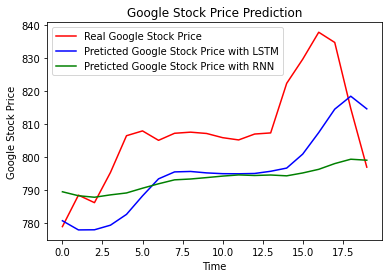

In [27]:
plt.plot(real_stock_price,color="red",label="Real Google Stock Price")
plt.plot(predicted_stock_price_LSTM,color="blue",label="Preticted Google Stock Price with LSTM")
plt.plot(predicted_stock_price_RNN,color="green",label="Preticted Google Stock Price with RNN")
plt.title("Google Stock Price Prediction")
plt.xlabel("Time")
plt.ylabel("Google Stock Price")
plt.legend()
plt.show()

### Performance:

Based on the above vizualization, we can conclude that the LSTM model is performing better than the RNN model.
